In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- In SMA, we looked at 3 months period, 6 months period, 12 months period to compute average in order to forcast for future period.
- More recent data is a better influencer of forecast.
- So we need to give more weightage to recent data compared to older data while doing forecast

$\hat{Y}_{t+1}$ = $\frac{a*Y_1 + b*Y_2 + c*Y_3 + k*Y_t}{(a+b+c+ ...k)}$

a < b< c ...<k, k is the largest weight

### Simple exponential smoothing technique, also known as Single exponential technique

**Exponential smoothing** forecasting methods are similar in that a prediction is a weighted sum of past observations, but the model explicitly uses an exponentially decreasing weight for past observations.

In exponential smoothing technique, the forecast observation data, $Y_{t+1}$, is a function of the level component that is denoted by 
$l_{t}$, and the level component is written as follows:<br>
   
$l_{t}$ = $\alpha*y_t + (1-\alpha) * l_{t-1} $ <br>

$l_{t-1}$ = $\alpha*y_{t-1} + (1-\alpha) * l_{t-2}$ <br>

putting all together <br><br>

$\hat{Y}_{t+1}$ = $\alpha*y_{t} + \alpha*(1-\alpha)y_{t-1} + \alpha*(1-\alpha)^2y_{t-2}$
<br>
where 0 <= $\alpha$ <= 1, is smoothing parameter or smoothing coefficient


In [2]:
Quarters = ['Q'+str(q)+'-'+str(yr)  for yr in [17,18,19] for q in range(1,5)]
Actual = [80, 130, 140, 90, 112, 182, 196, 126, 157, 255, 274, 176]

d = {'Quarter': Quarters, 'Actual_Sales':Actual}
data = pd.DataFrame(d)
data.head()

,Quarter,Actual_Sales
0,Q1-17,80
1,Q2-17,130
2,Q3-17,140
3,Q4-17,90
4,Q1-18,112


In [3]:
def get_level(S, alpha):
    level = pd.Series(dtype='float')
    level.at[0] = S[0]
    for i in range(1,len(S)):
        level[i] = alpha * S[i] + (1-alpha) * level[i-1]
    return level

Text(0.5, 1.0, 'SES - alpha=0.2')

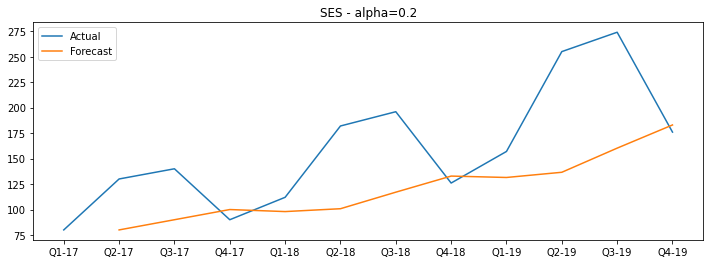

In [4]:
alpha = 0.2

ses = data.copy()
ses['level'] = get_level(ses.Actual_Sales, 0.2)
ses['forecast'] = pd.Series(np.nan).append(ses['level'], ignore_index=True)

plt.figure(figsize=(12,4))
plt.plot(ses.Quarter, ses.Actual_Sales, label='Actual')
plt.plot(ses.Quarter, ses.forecast, label='Forecast')

plt.legend()
plt.title('SES - alpha=0.2')


Text(0.5, 1.0, 'SES - alpha=0.3')

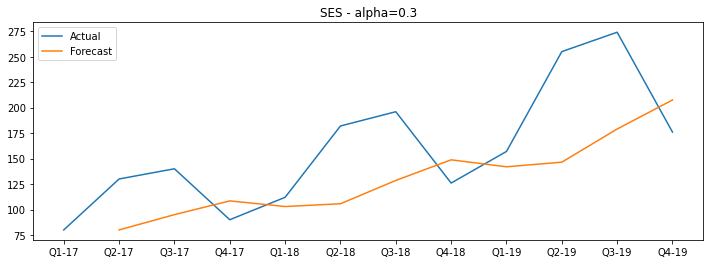

In [51]:
alpha = 0.3

ses = data.copy()
ses['level'] = get_level(ses.Actual_Sales, 0.3)
ses['forecast'] = pd.Series(np.nan).append(ses['level'], ignore_index=True)

plt.figure(figsize=(12,4))
plt.plot(ses.Quarter, ses.Actual_Sales, label='Actual')
plt.plot(ses.Quarter, ses.forecast, label='Forecast')

plt.legend()
plt.title('SES - alpha=0.3')

Text(0.5, 1.0, 'SES - alpha=0.5')

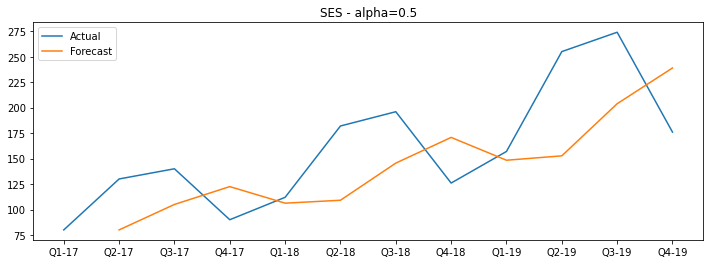

In [5]:
alpha = 0.5

ses = data.copy()
ses['level'] = get_level(ses.Actual_Sales, 0.5)
ses['forecast'] = pd.Series(np.nan).append(ses['level'], ignore_index=True)

plt.figure(figsize=(12,4))
plt.plot(ses.Quarter, ses.Actual_Sales, label='Actual')
plt.plot(ses.Quarter, ses.forecast, label='Forecast')

plt.legend()
plt.title('SES - alpha=0.5')

Text(0.5, 1.0, 'SES - alpha=0.8')

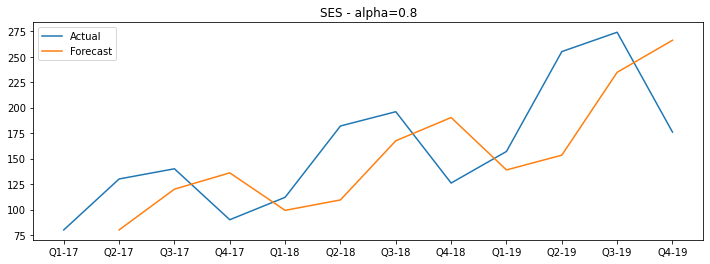

In [6]:
alpha = 0.8

ses = data.copy()
ses['level'] = get_level(ses.Actual_Sales, 0.8)
ses['forecast'] = pd.Series(np.nan).append(ses['level'], ignore_index=True)

plt.figure(figsize=(12,4))
plt.plot(ses.Quarter, ses.Actual_Sales, label='Actual')
plt.plot(ses.Quarter, ses.forecast, label='Forecast')

plt.legend()
plt.title('SES - alpha=0.8')

As we know that time-series data primarily consists of the following three components:

- **Level**
- **Trend**
- **Seasonality**

The exponential smoothing techniques, will help you capture each of the aforementioned three components one by one.
Let’s first understand the simple exponential smoothing technique that helps us in capturing the level of time series data.

In [7]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [8]:
#read data from file
df = pd.read_csv(r'./data/airline-traffic.csv', header=None)

#rename column headers
df.columns  =['Month', 'Passengers']

# make month column as datetime
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Change month column as index
df.set_index('Month', inplace=True)

# impute missing values by linear interpolate 
df.Passengers.interpolate(method='linear', inplace=True)

# change datatype of passengers as int
df['Passengers'] = df['Passengers'].astype('int')

### Split data into train , test
train =  df[0:120]
test  =  df[120:]

In [9]:
train.index = pd.DatetimeIndex(train.index.values,
                               freq=train.index.inferred_freq)

**Simple Exponential Smoothing** <br>
The simple exponetial model captures the level of a time series. <br>
$\hat{Y}_{t+1} = l_{t}$, where l is level component

$l_{t} = \alpha*y_t + (1-\alpha)*l_{t-1}$ <br>

alpha is level smoothing parameter, 0 < alpha < 1


In [ ]:
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2, optimized=False)
print(model_fit.params)

y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test)) 


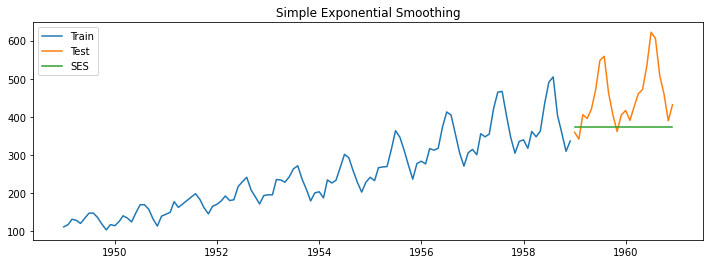

In [13]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='SES')

plt.legend(loc='best')
plt.title('Simple Exponential Smoothing')
plt.show()

In [21]:
### read temperature dataset

temp = pd.read_csv(r'./data/temperature.csv')

# convert Date column to datetime 
temp['Date'] = pd.to_datetime(temp['Date'])

# set index of dataframe as Date
temp.set_index('Date', inplace=True)

temp.head()

,Temperature(Min)
Date,
2017-01-01,14.3
2017-01-02,17.4
2017-01-03,18.5
2017-01-04,16.8
2017-01-05,11.5


In [25]:
train = temp.iloc[0:511]
test  = temp.iloc[511:]

train.index = pd.DatetimeIndex(train.index.values,
                               freq=train.index.inferred_freq)

In [30]:
temp_model = SimpleExpSmoothing(train.iloc[:, 0])
temp_model_fit = temp_model.fit(smoothing_level=0.2)

y_hat_ses = test.copy()
y_hat_ses['SES'] = temp_model_fit.forecast(len(test))

# error
error = y_hat_ses.iloc[:, 0] - y_hat_ses.iloc[:, 1]

rmse = np.sqrt((np.sum(error**2))/len(error))
mape = (np.sum(abs(error) / y_hat_ses.iloc[:,0])) * 100 / len(error)

print(f"RMSE: {rmse}, MAPE:{mape}")

RMSE: 3.5560737695562894, MAPE:30.235129127238594


In [37]:
print(f"Level:{get_level(temp.iloc[0:511, 0], 0.2).iloc[-1]}")

Level:9.19970024132527
